**Hackathon 5:E-commerce Price Prediction**

**Platform**: Analytics India Magazine

**Link**:[E-commerce Price Prediction](https://www.machinehack.com/course/e-commerce-price-prediction-weekend-hackathon-8/)

**Pulic Leaderboard Rank**:7

**Private Leaderboard Rank**:9

## Description : 

E-commerce platforms have been in existence for more than 2 decades now. The popularity and its preference as a common choice for buying and selling essential products have grown rapidly and exponentially over the past few years. E-commerce has impacted the lifestyle of common people to a huge extent. Many such platforms are competing over each other for dominance by providing consumer goods at a competitive price. In this hackathon, we challenge data science enthusiasts to predict the price of commodities on an e-commerce platform.

## AIM:

**Given are 7 distinguishing factors that can influence the price of a product on an e-commerce platform. Your objective as a data scientist is to build a machine learning model that can accurately predict the price of a product based on the given factors.**

# Data Analysis

In [1]:
#import necessary libraries

import pandas as pd
pd.set_option('display.max_rows', 500)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import KFold, StratifiedKFold, train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
pip install eli5

Note: you may need to restart the kernel to use updated packages.


In [3]:
#ELI5 is a Python package which helps to debug machine learning classifiers and explain their predictions.
from eli5.sklearn import PermutationImportance

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)
Using TensorFlow backend.


In [4]:
#import datasets

train = pd.read_csv('../input/Train.csv')
test = pd.read_csv('../input/Test.csv')



In [5]:
#Lets look at the train and test datasets
print(train.head(),test.head())

  Product Product_Brand             Item_Category     Subcategory_1  \
0  P-2610         B-659        bags wallets belts              bags   
1  P-2453        B-3078                  clothing  women s clothing   
2  P-6802        B-1810  home decor festive needs        showpieces   
3  P-4452        B-3078  beauty and personal care          eye care   
4  P-8454        B-3078                  clothing    men s clothing   

       Subcategory_2  Item_Rating      Date  Selling_Price  
0          hand bags          4.3  02-03-17            291  
1       western wear          3.1  07-01-15            897  
2             ethnic          3.5  01-12-19            792  
3  h2o plus eye care          4.0  12-12-14            837  
4           t shirts          4.3  12-12-13            470      Product Product_Brand Item_Category              Subcategory_1  \
0  P-11284        B-2984     computers         network components   
1   P-6580        B-1732     jewellery  bangles bracelets armlets   


In [6]:
print(train.info(),test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2451 entries, 0 to 2450
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Product        2451 non-null   object 
 1   Product_Brand  2451 non-null   object 
 2   Item_Category  2451 non-null   object 
 3   Subcategory_1  2451 non-null   object 
 4   Subcategory_2  2451 non-null   object 
 5   Item_Rating    2451 non-null   float64
 6   Date           2451 non-null   object 
 7   Selling_Price  2451 non-null   int64  
dtypes: float64(1), int64(1), object(6)
memory usage: 153.3+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1051 entries, 0 to 1050
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Product        1051 non-null   object 
 1   Product_Brand  1051 non-null   object 
 2   Item_Category  1051 non-null   object 
 3   Subcategory_1  1051 non-null   object 
 4   Subcategory_2  

**Some Observations**:


*   We have 6 features(1 float nd 5 object type)
*   There are no null values in the dataset
*   Date feature maybe used to create some additional features of interest






**Target Variable Distribution**

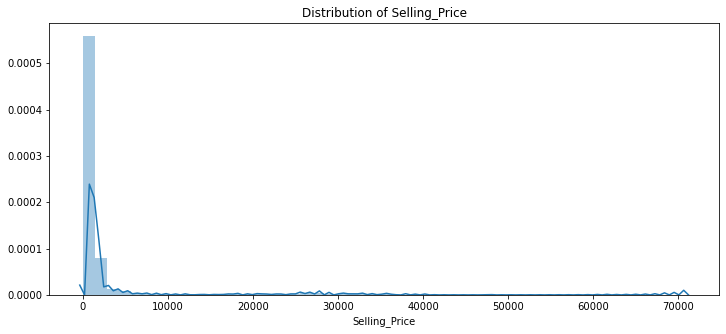

In [7]:
plt.figure(figsize=(12,5))
plt.title("Distribution of Selling_Price")
ax = sns.distplot(train["Selling_Price"])



> The Distribution of our target variable is highly left skewed, hence we will be performing log-transformation to make it more normal.




In [8]:
train['Selling_Price'] = np.log(train['Selling_Price'])

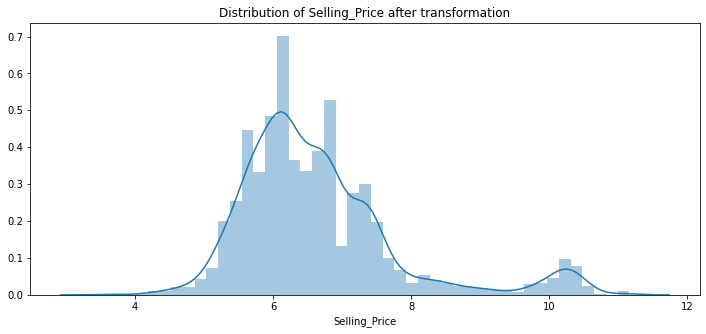

In [9]:
plt.figure(figsize=(12,5))
plt.title("Distribution of Selling_Price after transformation")
ax = sns.distplot(train["Selling_Price"])

**Item Rating vs Selling Price**

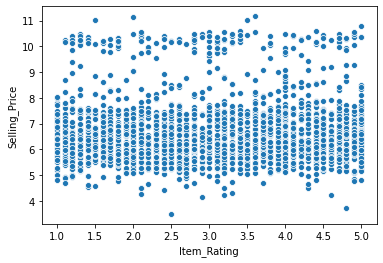

In [10]:
sns.scatterplot('Item_Rating','Selling_Price',data=train)



> No linear relationship can be seen whatsoever bw the two variables,hence 'Iten Rating' is not much of a use for us.



*Let us now combine our dataset and perform some analysis/feature engineering*

In [11]:
combine = train.append(test)

In [12]:
combine.head()

,Product,Product_Brand,Item_Category,Subcategory_1,Subcategory_2,Item_Rating,Date,Selling_Price
0,P-2610,B-659,bags wallets belts,bags,hand bags,4.3,02-03-17,5.673323
1,P-2453,B-3078,clothing,women s clothing,western wear,3.1,07-01-15,6.799056
2,P-6802,B-1810,home decor festive needs,showpieces,ethnic,3.5,01-12-19,6.674561
3,P-4452,B-3078,beauty and personal care,eye care,h2o plus eye care,4.0,12-12-14,6.729824
4,P-8454,B-3078,clothing,men s clothing,t shirts,4.3,12-12-13,6.152733


In [13]:
print(combine.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3502 entries, 0 to 1050
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Product        3502 non-null   object 
 1   Product_Brand  3502 non-null   object 
 2   Item_Category  3502 non-null   object 
 3   Subcategory_1  3502 non-null   object 
 4   Subcategory_2  3502 non-null   object 
 5   Item_Rating    3502 non-null   float64
 6   Date           3502 non-null   object 
 7   Selling_Price  2451 non-null   float64
dtypes: float64(2), object(6)
memory usage: 246.2+ KB
None


**General Observations**

-The features 'Product' and 'Product_Brand' though object type , can easily be converted into numeric by removing the char and separator to avoid encoding the data

-Item Category and Sucategory 1 & 2 features seem to have a lot of unique categorical values.



> Converting 'Product' and 'Product_Brand' to numeric type.



In [14]:
combine['Product']=combine['Product'].str.split('-', n=1, expand=True)[1]
combine['Product'] = combine['Product'].astype(int)
combine['Product'] = np.log(combine['Product'])


In [15]:
combine['Product_Brand']=combine['Product_Brand'].str.split('-', n=1, expand=True)[1]
combine['Product_Brand'] = combine['Product_Brand'].astype(int)
combine['Product_Brand'] = np.log(combine['Product_Brand'])

In [16]:
combine.dtypes

Product          float64
Product_Brand    float64
Item_Category     object
Subcategory_1     object
Subcategory_2     object
Item_Rating      float64
Date              object
Selling_Price    float64
dtype: object

**Now let us look at probably the 3 most important and interesting features (Item_category,subcategory1 and subcategory2) in detail**

In [17]:
cols = ['Item_Category','Subcategory_1','Subcategory_2']
for i in cols:
  print("============================")
  print("Categories in",i,": ")
  print(combine[i].value_counts())


Categories in Item_Category : 
clothing                                            1037
jewellery                                            601
automotive                                           268
footwear                                             247
computers                                            148
home decor festive needs                             138
kitchen dining                                       134
home furnishing                                      119
mobiles accessories                                  116
beauty and personal care                             111
watches                                               95
baby care                                             64
toys school supplies                                  57
bags wallets belts                                    54
tools hardware                                        52
pens stationery                                       49
furniture                                             40


In [18]:
  for i in cols:
    print("Total distinct categories in",i, ":",len(combine[i].unique()))

Total distinct categories in Item_Category : 95
Total distinct categories in Subcategory_1 : 142
Total distinct categories in Subcategory_2 : 395


-As observed, there are a lot of distinct categories in all the three features above hence OHE will not make sense here.

-We will be using frequency encoding for converting these features into numeric type

**One major issue to Adress**



> How to handle 'Unknown' category in subcategory1 and subcategory2?

**SOL**: Here is a simple and elegant solution provided by a friend...

And I quote......

*'Unkown is subcategory1/subcategory2 means that there is no hierarchial relationship bw Item_Category-Subcategory1-Subcategory2 which affects the selling price and hence if we find an unknown we can simply replace it by the category one level above'*




**Performing the above operations**

In [19]:
combine['Subcategory_1'] = np.where((combine['Subcategory_1']=='unknown'),combine['Item_Category'],combine['Subcategory_1'])
combine['Subcategory_2'] = np.where((combine['Subcategory_2']=='unknown'),combine['Subcategory_1'],combine['Subcategory_2'])

In [20]:
enc_nom = (combine.groupby('Item_Category').size()) / len(combine)
enc_nom
combine['Item_Category_encode'] = combine['Item_Category'].apply(lambda x : enc_nom[x])

In [21]:
enc_nom_1 = (combine.groupby('Subcategory_1').size()) / len(combine)
enc_nom_1
combine['Subcategory_1_encode'] = combine['Subcategory_1'].apply(lambda x : enc_nom_1[x])

In [22]:
enc_nom_2 = (combine.groupby('Subcategory_2').size()) / len(combine)
enc_nom_2
combine['Subcategory_2_encode'] = combine['Subcategory_2'].apply(lambda x : enc_nom_2[x])

**Extracting the additional Month feature from Date as it may be useful**

In [23]:
from datetime import datetime
combine['Date'] = pd.to_datetime(combine['Date'])
combine['Month'] = [date.month for date in combine.Date]

**Let us have a look at the final dataset after dropping unnecessary columns**

In [24]:
combine.drop(['Item_Category','Subcategory_1','Subcategory_2','Date','Item_Rating'],axis=1,inplace = True)

In [25]:
combine.head()

,Product,Product_Brand,Selling_Price,Item_Category_encode,Subcategory_1_encode,Subcategory_2_encode,Month
0,7.867106,6.490724,5.673323,0.015420,0.011422,0.004854,2
1,7.805067,8.032035,6.799056,0.296117,0.198458,0.109652,7
2,8.824972,7.501082,6.674561,0.039406,0.012850,0.005425,1
3,8.401109,8.032035,6.729824,0.031696,0.000571,0.000286,12
4,9.042395,8.032035,6.152733,0.296117,0.069389,0.024843,12


# Model Building

In [26]:
#Separating train and test datasets
train=combine[combine['Selling_Price'].isnull()!=True]
test=combine[combine['Selling_Price'].isnull()==True]

test=test.drop(['Selling_Price'], axis=1)

In [27]:
print(train.shape,test.shape)

(2451, 7) (1051, 6)


In [28]:
#train-test split
Y = train['Selling_Price']
X = train.drop('Selling_Price',axis=1)


X_train,X_val,Y_train,Y_val=train_test_split(X,Y,test_size=0.1,random_state=0)

In [29]:
print(X_train.shape,Y_train.shape)

(2205, 6) (2205,)


**I used 4 of the following tree based/boosting algorithms for training purpose:**



1.   CatBoost
2.   RandomForestRegressor
3.   XGBoost
4.   LightGBM



> Random Forest performed the best as a standalone model based on 10 fold CV score and public dataset results and hence hyper-parameter tuning was done only for it.

Score summary is provided at the end for each model







## CatBoost

In [30]:
pip install catboost


Note: you may need to restart the kernel to use updated packages.


In [31]:
from catboost import CatBoostRegressor
cb = CatBoostRegressor(
    n_estimators = 500,
    learning_rate = 0.1,
    loss_function = 'MAE',
    eval_metric = 'RMSE')

cb.fit(X_train,Y_train)

0:	learn: 1.1301934	total: 55.3ms	remaining: 27.6s
1:	learn: 1.0748083	total: 57.3ms	remaining: 14.3s
2:	learn: 1.0267575	total: 59ms	remaining: 9.78s
3:	learn: 0.9841578	total: 60.8ms	remaining: 7.54s
4:	learn: 0.9520076	total: 62.6ms	remaining: 6.2s
5:	learn: 0.9300172	total: 64.4ms	remaining: 5.3s
6:	learn: 0.9085860	total: 66ms	remaining: 4.65s
7:	learn: 0.8927597	total: 67.8ms	remaining: 4.17s
8:	learn: 0.8728633	total: 69.5ms	remaining: 3.79s
9:	learn: 0.8598712	total: 71.2ms	remaining: 3.49s
10:	learn: 0.8427194	total: 72.9ms	remaining: 3.24s
11:	learn: 0.8312328	total: 74.7ms	remaining: 3.04s
12:	learn: 0.8188238	total: 76.5ms	remaining: 2.87s
13:	learn: 0.8100752	total: 78.3ms	remaining: 2.72s
14:	learn: 0.8034640	total: 79.9ms	remaining: 2.58s
15:	learn: 0.7961084	total: 81.7ms	remaining: 2.47s
16:	learn: 0.7899737	total: 83.5ms	remaining: 2.37s
17:	learn: 0.7842445	total: 85.2ms	remaining: 2.28s
18:	learn: 0.7790760	total: 86.9ms	remaining: 2.2s
19:	learn: 0.7733010	total: 8

In [32]:
import eli5
perm = PermutationImportance(cb,random_state=100).fit(X_val, Y_val)
eli5.show_weights(perm,feature_names=X_val.columns.tolist())

Weight,Feature
0.6728 ± 0.0564,Subcategory_2_encode
0.3237 ± 0.0770,Subcategory_1_encode
0.1680 ± 0.0466,Month
0.1496 ± 0.0539,Item_Category_encode
0.0746 ± 0.0364,Product_Brand
0.0316 ± 0.0153,Product


In [33]:
from sklearn.metrics import mean_squared_error
kf=KFold(n_splits=10, random_state=100, shuffle=True)

y_test_predict=0
mse = 0
j=1
result={}

for i, (train_index, test_index) in enumerate(kf.split(train)):
    
   Y_train, Y_valid = Y.iloc[train_index], Y.iloc[test_index]
   X_train, X_valid = X.iloc[train_index,:], X.iloc[test_index,:]
   
   print( "\nFold ", j)
   cb = CatBoostRegressor(
    n_estimators = 1000,
    learning_rate = 0.05,
    max_depth = 6,
    boosting_type = 'Ordered',
    loss_function = 'RMSE',
    eval_metric = 'RMSE',verbose = 0)
   
  #  xg=XGBRegressor(booster='gbtree', max_depth=5, learning_rate=0.05, reg_alpha=0,
  #                 reg_lambda=1, n_jobs=-1, random_state=100, n_estimators=5000)
    
   model=cb.fit(X_train,Y_train)
   pred = model.predict(X_valid)
   
   print(np.sqrt(mean_squared_error(Y_valid, np.abs(pred))))
   mse+=np.sqrt(mean_squared_error(Y_valid,np.abs(pred)))
    
   #y_test_predict+=model.predict(test)  
   #result[j]=model.predict(X_main_test)
   j+=1

results=y_test_predict/10

print(mse/10)


Fold  1
0.7411350342271313

Fold  2
0.682366771854119

Fold  3
0.6774146591859156

Fold  4
0.6860167265019047

Fold  5
0.6636652445894878

Fold  6
0.6175774038249462

Fold  7
0.6681479653720559

Fold  8
0.5886879966253324

Fold  9
0.681755587717508

Fold  10
0.5628555289058577
0.6569622918804259


In [34]:
# model3=cb.fit(x,y)
# pred_cb = model3.predict(test)
# pred_cb = np.abs(pred_cb)
# pred_cb

## RandomForestRegressor

In [35]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100,criterion='mse',
                           
                           min_samples_leaf=1, 
                           min_samples_split = 5, 
                           random_state=100)
rf.fit(X_train,Y_train)


RandomForestRegressor(min_samples_split=5, random_state=100)

In [36]:
import eli5
perm = PermutationImportance(rf,random_state=100).fit(X_val, Y_val)
eli5.show_weights(perm,feature_names=X_val.columns.tolist())

Weight,Feature
0.9637 ± 0.1361,Subcategory_2_encode
0.2777 ± 0.0567,Subcategory_1_encode
0.2543 ± 0.0502,Item_Category_encode
0.2183 ± 0.0253,Product_Brand
0.2120 ± 0.0481,Month
0.1201 ± 0.0104,Product


In [37]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 300, stop = 500, num = 10)]
# Number of features to consider at every split
max_features = ['auto','sqrt']
#max_features = ['sqrt']
# Maximum number of levels in tree
#max_depth = [int(x) for x in np.linspace(6, 30, num = 5)]
#max_depth.append(None)
# Minimum number of samples required to split a node
#min_samples_split = [2, 4,6]
min_samples_split = [4,5,6,7]
# Minimum number of samples required at each leaf node
#min_samples_leaf = [1, 2, 4]
min_samples_leaf = [1]
# Method of selecting samples for training each tree
#bootstrap = [True, False]
bootstrap = [True]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               #'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [300, 322, 344, 366, 388, 411, 433, 455, 477, 500], 'max_features': ['auto', 'sqrt'], 'min_samples_split': [4, 5, 6, 7], 'min_samples_leaf': [1], 'bootstrap': [True]}


In [38]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, Y_train)

Fitting 3 folds for each of 80 candidates, totalling 240 fits


/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_search.py:282: UserWarning: The total space of parameters 80 is smaller than n_iter=100. Running 80 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   23.9s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:  2.1min finished


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1],
                                        'min_samples_split': [4, 5, 6, 7],
                                        'n_estimators': [300, 322, 344, 366,
                                                         388, 411, 433, 455,
                                                         477, 500]},
                   random_state=42, verbose=2)

In [39]:
rf_random.best_params_

{'n_estimators': 500,
 'min_samples_split': 4,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'bootstrap': True}

In [40]:
# from sklearn.model_selection import GridSearchCV
# # Create the parameter grid based on the results of random search 
# param_grid = {
#     'bootstrap': [True],
#     'max_features': [1,2,3],
#     'min_samples_leaf': [1],
#     'min_samples_split': [4,5],
#     'n_estimators': [300,350,400]
# }
# # Create a based model
# rf = RandomForestRegressor()
# # Instantiate the grid search model
# grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
#                           cv = 3, n_jobs = -1, verbose = 2)

In [41]:
# grid_search.fit(X_train, Y_train)

In [42]:
# grid_search.best_params_

In [43]:
#Calsulating cv score using the best parameters
kf=KFold(n_splits=10, random_state=100, shuffle=True)

y_test_predict=0
mse = 0
j=1
result={}

for i, (train_index, test_index) in enumerate(kf.split(train)):
    
   Y_train, Y_valid = Y.iloc[train_index], Y.iloc[test_index]
   X_train, X_valid = X.iloc[train_index,:], X.iloc[test_index,:]
   
   print( "\nFold ", j)
   
   rf = RandomForestRegressor(n_estimators=455,
                           max_features='sqrt',
                           bootstrap='True',
                           min_samples_leaf=1,
                           min_samples_split=4,
                           random_state=100)
  #  xg=XGBRegressor(booster='gbtree', max_depth=5, learning_rate=0.05, reg_alpha=0,
  #                 reg_lambda=1, n_jobs=-1, random_state=100, n_estimators=5000)
    
   model=rf.fit(X_train,Y_train)
   pred = model.predict(X_valid)
   
   print(np.sqrt(mean_squared_error(Y_valid, np.abs(pred))))
   mse+=np.sqrt(mean_squared_error(Y_valid,np.abs(pred)))
    
   #y_test_predict+=model.predict(test)  
   #result[j]=model.predict(X_main_test)
   j+=1

results=y_test_predict/10

print(mse/10)


Fold  1
0.7142610754817043

Fold  2
0.6553409887384034

Fold  3
0.6348523892976197

Fold  4
0.6544553370908832

Fold  5
0.6433879025292333

Fold  6
0.5867614645835404

Fold  7
0.6613544024521539

Fold  8
0.5933015724829959

Fold  9
0.6602349966695372

Fold  10
0.548624625060645
0.6352574754386715


In [44]:
x = X_train.append(X_valid)
y = Y_train.append(Y_valid)
x.head()


,Product,Product_Brand,Item_Category_encode,Subcategory_1_encode,Subcategory_2_encode,Month
0,7.867106,6.490724,0.015420,0.011422,0.004854,2
1,7.805067,8.032035,0.296117,0.198458,0.109652,7
3,8.401109,8.032035,0.031696,0.000571,0.000286,12
4,9.042395,8.032035,0.296117,0.069389,0.024843,12
5,8.629986,7.304516,0.039406,0.008852,0.005997,9


In [45]:
#Training the model on whole dataset
model=rf.fit(x,y)
pred = model.predict(test)
pred = np.abs(pred)
pred

array([7.47061157, 6.08016488, 6.57097318, ..., 6.81695717, 6.61643392,
       7.36801826])

## XGBOOST

In [46]:
from xgboost import XGBRegressor
#xgb = xgb.XGBRegressor(objective ='reg:squarederror',  learning_rate = 0.1,
#                max_depth = 8, alpha = 10, n_estimators = 400)

xgb=XGBRegressor(booster='gbtree', max_depth=6, learning_rate=0.1, reg_alpha=0,
                  reg_lambda=1, n_jobs=-1, random_state=100, n_estimators=500)
xgb.fit(X_train,Y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=500, n_jobs=-1, num_parallel_tree=1, random_state=100,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [47]:
import eli5
perm = PermutationImportance(xgb,random_state=100).fit(X_val, Y_val)
eli5.show_weights(perm,feature_names=X_val.columns.tolist())

Weight,Feature
0.7117 ± 0.0698,Subcategory_2_encode
0.2747 ± 0.0490,Product_Brand
0.2194 ± 0.0379,Product
0.2072 ± 0.0272,Subcategory_1_encode
0.1959 ± 0.0495,Item_Category_encode
0.1532 ± 0.0243,Month


In [48]:
import warnings
warnings.filterwarnings('ignore')
kf=KFold(n_splits=10, random_state=100, shuffle=True)

y_test_predict=0
mse = 0
j=1
result={}

for i, (train_index, test_index) in enumerate(kf.split(train)):
    
   Y_train, Y_valid = Y.iloc[train_index], Y.iloc[test_index]
   X_train, X_valid = X.iloc[train_index,:], X.iloc[test_index,:]
   
   print( "\nFold ", j)
   
   xg=XGBRegressor(booster='gbtree', max_depth=6, learning_rate=0.06,
                  n_jobs=-1, random_state=100, n_estimators=800)
    
   model=xg.fit(X_train,Y_train)
   pred = model.predict(X_valid)
   
   print(np.sqrt(mean_squared_error(Y_valid, np.abs(pred))))
   mse+=np.sqrt(mean_squared_error(Y_valid,np.abs(pred)))
    
   #y_test_predict+=model.predict(test)  
   #result[j]=model.predict(X_main_test)
   j+=1

results=y_test_predict/10

print(mse/10)


Fold  1
0.7493096155696769

Fold  2
0.6870521046529318

Fold  3
0.65307488253869

Fold  4
0.6912253063087638

Fold  5
0.6888369612302698

Fold  6
0.6067211982020364

Fold  7
0.6408013288474832

Fold  8
0.6314743025936045

Fold  9
0.6810184298065237

Fold  10
0.5703940975738316
0.6599908227323812


In [49]:
model2=xg.fit(x,y)
pred_xg = model2.predict(test)
pred_xg = np.abs(pred_xg)
pred_xg

array([7.4993863, 5.9725986, 6.5689936, ..., 6.853985 , 6.1330338,
       7.3612227], dtype=float32)

## LightGBM

In [50]:
from lightgbm import LGBMRegressor
lgb = LGBMRegressor(boosting_type='gbdt', objective='regression',metric = 'rmsle',
                      max_depth=6, learning_rate=0.1, 
                      n_estimators=500, nthread=-1, silent=True)
lgb.fit(X_train,Y_train)

LGBMRegressor(max_depth=6, metric='rmsle', n_estimators=500, nthread=-1,
              objective='regression')

In [51]:
from sklearn.metrics import mean_squared_error
predictions = lgb.predict(X_val)
np.sqrt(mean_squared_error(Y_val, predictions))

0.44704157259300803

In [52]:
import eli5
perm = PermutationImportance(lgb,random_state=100).fit(X_val, Y_val)
eli5.show_weights(perm,feature_names=X_val.columns.tolist())

Weight,Feature
0.7293 ± 0.0967,Subcategory_2_encode
0.3087 ± 0.0688,Product_Brand
0.2128 ± 0.0286,Item_Category_encode
0.1826 ± 0.0323,Subcategory_1_encode
0.1608 ± 0.0167,Month
0.1605 ± 0.0267,Product


In [53]:
import warnings
warnings.filterwarnings('ignore')
kf=KFold(n_splits=10, random_state=100, shuffle=True)

y_test_predict=0
mse = 0
j=1
result={}

for i, (train_index, test_index) in enumerate(kf.split(train)):
    
   Y_train, Y_valid = Y.iloc[train_index], Y.iloc[test_index]
   X_train, X_valid = X.iloc[train_index,:], X.iloc[test_index,:]
   
   print( "\nFold ", j)
   
   lg = LGBMRegressor(boosting_type='gbdt', objective='regression',metric = 'rmsle',
                      max_depth=8, learning_rate=0.025, 
                      n_estimators=750, nthread=-1, silent=True)
    
   model=lg.fit(X_train,Y_train)
   pred = model.predict(X_valid)
   
   print(np.sqrt(mean_squared_error(Y_valid, np.abs(pred))))
   mse+=np.sqrt(mean_squared_error(Y_valid,np.abs(pred)))
    
   #y_test_predict+=model.predict(test)  
   #result[j]=model.predict(X_main_test)
   j+=1

results=y_test_predict/10

print(mse/10)


Fold  1
0.7285547172591073

Fold  2
0.6886335171803146

Fold  3
0.665017072628344

Fold  4
0.6513018362001174

Fold  5
0.6722492456603386

Fold  6
0.6209983378639199

Fold  7
0.6540704291926426

Fold  8
0.5899081061049939

Fold  9
0.7074718017888185

Fold  10
0.5385134736592888
0.6516718537537884


In [54]:
model4=lg.fit(x,y)
pred_lg = model4.predict(test)
pred_lg = np.abs(pred_lg)
pred_lg

array([7.65438973, 6.2653305 , 6.59759988, ..., 6.97489851, 6.24150027,
       7.36813234])

# Summary


**Public Score(30% dataset)**

**Metric-rmsle**
*   Catboost : 0.698
*   Random Forest: 0.646
*   Light GBM : 0.687
*   XGBoost: 0.66





**Private Score(100% dataset): 0.63579**

**Model- RandomForestRegressor**


# Submission File

In [55]:
Dataset_Submission=pd.read_excel('/content/Sample_Submission.xlsx')
Dataset_Submission['Selling_Price']=np.exp(pred)
Dataset_Submission.head(10)

Dataset_Submission.to_excel('submission15.xlsx', index=False)

FileNotFoundError: [Errno 2] No such file or directory: '/content/Sample_Submission.xlsx'

# Remarks

## <a>Do Upvote if you liked the approach and comment if you have any suggestions</a>

THANKS!!!